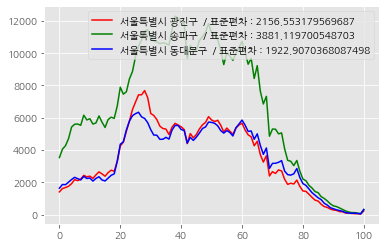

In [20]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('population.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data) #열 구분 제외
header = next(data) #총인구수 제외
pop_list =[]
for row in data:
    temp = row[4:]
    temp = [int(x.replace(',', '')) for x in temp]
    temp.insert(0, row[1])
    pop_list.append(temp)
f.close()

gwangjin = pop_list[4] #광진구 인구수 리스트
max_dif = [] #가장 다른 인구수 리스트
min_dif = [] #가장 비슷한 인구수 리스트
max_sum = 0
min_sum = 99999999999999999999999
temp_sum = 0
for i in range(0, len(pop_list)):
    temp = pop_list[i]
    if(temp[0] != '서울특별시 광진구 '): #같은 지역 제외
        temp_sum = 0
        for j in range(1, len(temp)):
            temp_sum = temp_sum + (int(gwangjin[j]) - int(temp[j])) ** 2
        if temp_sum > max_sum:
            max_sum = temp_sum
            max_dif = temp
        if temp_sum < min_sum:
            min_sum = temp_sum
            min_dif = temp
            
plt.rc('font', family='NanumGothic') #폰트 설정

plt.style.use('ggplot')
plt.plot(gwangjin[1:], color='r', label="{0} / 표준편차 : {1}".format(gwangjin[0], np.std(gwangjin[1:])))
plt.plot(max_dif[1:], color='g', label="{0} / 표준편차 : {1}".format(max_dif[0], np.std(max_dif[1:])))
plt.plot(min_dif[1:], color='b', label="{0} / 표준편차 : {1}".format(min_dif[0], np.std(min_dif[1:])))

plt.legend()
plt.show()